In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 数据导入及处理
## 导入数据
包括nodes,edges,features

In [2]:
dfnodes = pd.read_csv('github数据集/musae_git_target.csv')
dfnodes

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1
...,...,...,...
37695,37695,shawnwanderson,1
37696,37696,kris-ipeh,0
37697,37697,qpautrat,0
37698,37698,Injabie3,1


In [3]:
dfedges = pd.read_csv('github数据集/musae_git_edges.csv')
dfedges

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982
...,...,...
288998,37527,37596
288999,37529,37601
289000,37644,2347
289001,25879,2347


In [4]:
dfstars = pd.read_csv('github数据集/musae_git_features.csv')
dfstars

,node,feature
0,0,1574
1,0,3773
2,0,3571
3,0,2672
4,0,2478
...,...,...
690369,37699,1764
690370,37699,3771
690371,37699,234
690372,37699,968


In [5]:
# 汇总每个节点的stars数量
group_stars = dfstars.groupby('node')
#group_stars.apply(print)

In [6]:
sum_stars = group_stars.sum()
sum_stars

,feature
node,
0,42862
1,23812
2,33559
3,34022
4,32979
...,...
37695,46126
37696,29251
37697,39222


In [7]:
# 将stars属性加入表格
dfnodes['stars']=sum_stars['feature']
dfnodes

,id,name,ml_target,stars
0,0,Eiryyy,0,42862
1,1,shawflying,0,23812
2,2,JpMCarrilho,1,33559
3,3,SuhwanCha,0,34022
4,4,sunilangadi2,1,32979
...,...,...,...,...
37695,37695,shawnwanderson,1,46126
37696,37696,kris-ipeh,0,29251
37697,37697,qpautrat,0,39222
37698,37698,Injabie3,1,43347


In [8]:
# 节点按stars数量排序
sort_dfnodes = dfnodes.sort_values(ascending = False, by='stars')
sort_dfnodes

,id,name,ml_target,stars
1687,1687,DaiAoki,0,86860
6917,6917,DigitalMachinist,0,76497
36609,36609,VladimirAndropov,1,76492
11304,11304,adrianbadarau,0,76060
16224,16224,bencyn,0,75897
...,...,...,...,...
24171,24171,longting,0,13702
6720,6720,csming1995,0,13649
8504,8504,nks5295,0,13526
529,529,ahsanatha,1,11571


## 选择数据
选择stars数量前1000的github开发者

In [9]:
ori_nodes = sort_dfnodes[0:1000]
ori_nodes

,id,name,ml_target,stars
1687,1687,DaiAoki,0,86860
6917,6917,DigitalMachinist,0,76497
36609,36609,VladimirAndropov,1,76492
11304,11304,adrianbadarau,0,76060
16224,16224,bencyn,0,75897
...,...,...,...,...
13380,13380,landonia,1,54790
16459,16459,epdjsmit,0,54787
34857,34857,macagua,0,54786
27111,27111,cg219,0,54785


## 雪球抽样
二级抽样

In [10]:
#第一层抽样，从1000个初始点出发找和他们相连的用户
filter1 = dfedges['id_1'].isin(ori_nodes['id'])
edges_roll1=dfedges[filter1]
nodes_roll1_list = list(set.union(set(edges_roll1['id_1']),set(edges_roll1['id_2']))) #一层抽样后包含的节点
print(len(nodes_roll1_list))

2576


In [11]:
edges_roll1

,id_1,id_2
249,6071,5061
250,6071,31890
251,6071,31987
252,6071,11051
253,6071,1739
...,...,...
288150,35825,36680
288164,35851,36652
288819,21815,37115
288840,32216,2347


In [12]:
#一层抽样后的节点表
nodes_roll1_df = dfnodes[dfnodes['id'].isin(nodes_roll1_list)]
nodes_roll1_df

,id,name,ml_target,stars
56,56,TarrySingh,1,28184
73,73,kentcdodds,0,46726
88,88,keyvanakbary,0,36368
94,94,starkwang,0,34496
187,187,boxabirds,1,61691
...,...,...,...,...
37557,37557,davidsonfellipe,0,32214
37591,37591,dimitrinicolas,0,37715
37663,37663,gabriel-hahn,0,44426
37687,37687,llopez,0,50591


In [13]:
# 二层抽样
filter2 = dfedges['id_1'].isin(nodes_roll1_df['id'])
edges_roll2 = dfedges[filter2]
edges_roll2

,id_1,id_2
249,6071,5061
250,6071,31890
251,6071,31987
252,6071,11051
253,6071,1739
...,...,...
288987,37471,37627
288988,37471,37644
288989,37471,37393
288990,37471,25270


In [14]:
nodes_roll2_list = list(set.union(set(edges_roll2['id_1']),set(edges_roll2['id_2'])))
len(nodes_roll2_list)

19746

In [15]:
filter_nodes = dfnodes['id'].isin(nodes_roll2_list)
nodes_roll2_df = dfnodes[filter_nodes]

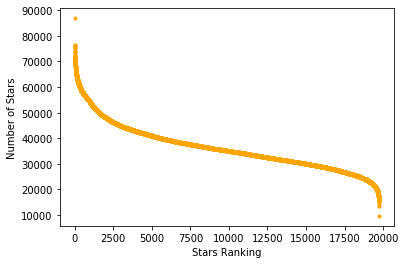

In [16]:
sorted_nodes = nodes_roll2_df.sort_values(ascending=False,by='stars')
plt.xlabel('Stars Ranking')
plt.ylabel('Number of Stars')
plt.scatter(x=range(len(nodes_roll2_df)),y=sorted_nodes['stars'],color = 'orange',marker='.')
plt.savefig('./stars.png')

# 生成网络

In [17]:
# 一层抽样网络
g1 = nx.DiGraph()
edges_roll1_tuple = [tuple(x) for x in edges_roll1.values]
g1.add_edges_from(edges_roll1_tuple)
print(g1.number_of_edges())
print(g1.number_of_nodes())

2903
2576


In [18]:
# 二层抽样网络
g2 = nx.DiGraph()
edges_roll2_tuple = [tuple(x) for x in edges_roll2.values]
g2.add_edges_from(edges_roll2_tuple)
print(g2.number_of_edges())
print(g2.number_of_nodes())

68144
19746


# 网络结构统计特性

## 无标度现象-度分布

### g2度分布（度，入度，出度）

In [19]:
g2deg = g2.degree
# 度排序
sorted(dict(g2deg).items(),key=lambda kv:(-kv[1],kv[0]))

[(27803, 6813),
 (31890, 2616),
 (13638, 1678),
 (19222, 1653),
 (9051, 1397),
 (2078, 1297),
 (35773, 1274),
 (7027, 1233),
 (10001, 1171),
 (5629, 1121),
 (73, 1091),
 (33671, 1080),
 (11051, 910),
 (19253, 755),
 (14242, 650),
 (6631, 518),
 (3712, 516),
 (18945, 504),
 (22881, 488),
 (14954, 453),
 (22642, 426),
 (10080, 422),
 (10830, 415),
 (23589, 411),
 (25477, 395),
 (20173, 384),
 (23664, 376),
 (22353, 362),
 (30002, 358),
 (2431, 347),
 (35008, 331),
 (21142, 327),
 (36652, 315),
 (36628, 314),
 (22321, 305),
 (15191, 301),
 (9633, 293),
 (11573, 290),
 (7006, 289),
 (20854, 288),
 (23838, 280),
 (9008, 279),
 (10568, 275),
 (18638, 269),
 (25249, 250),
 (11814, 241),
 (28957, 238),
 (18163, 237),
 (33029, 234),
 (5061, 233),
 (30199, 232),
 (21375, 231),
 (16631, 228),
 (15405, 218),
 (13857, 214),
 (6645, 212),
 (8357, 205),
 (27302, 202),
 (15192, 200),
 (32415, 197),
 (11081, 190),
 (18876, 190),
 (10403, 189),
 (27450, 189),
 (7339, 187),
 (21754, 186),
 (16726, 185),


In [20]:
# 出度
g2_odeg = g2.out_degree()
sorted(dict(g2_odeg).items(),key=lambda kv:(-kv[1],kv[0]))

[(27803, 6809),
 (31890, 1988),
 (13638, 1610),
 (19222, 1459),
 (9051, 1378),
 (2078, 1295),
 (7027, 1224),
 (10001, 1149),
 (5629, 1111),
 (73, 1085),
 (33671, 1064),
 (35773, 923),
 (11051, 882),
 (19253, 681),
 (14242, 608),
 (6631, 512),
 (18945, 494),
 (14954, 442),
 (10080, 416),
 (10830, 400),
 (22642, 393),
 (22881, 393),
 (3712, 380),
 (20173, 364),
 (23589, 346),
 (2431, 341),
 (22353, 315),
 (21142, 299),
 (25477, 298),
 (23664, 297),
 (9633, 288),
 (11573, 285),
 (7006, 283),
 (9008, 273),
 (22321, 268),
 (18638, 252),
 (30002, 236),
 (10568, 230),
 (20854, 230),
 (5061, 228),
 (11814, 228),
 (16631, 218),
 (23838, 213),
 (6645, 209),
 (25249, 205),
 (8357, 201),
 (15405, 199),
 (21375, 193),
 (13857, 192),
 (32415, 191),
 (7339, 180),
 (10403, 178),
 (7317, 175),
 (15192, 175),
 (4447, 169),
 (9532, 167),
 (18876, 167),
 (28957, 164),
 (16321, 163),
 (16726, 160),
 (11081, 158),
 (16390, 155),
 (17099, 154),
 (5673, 153),
 (21754, 149),
 (27302, 146),
 (25630, 145),
 (230

In [21]:
# 入度
g2_ideg = g2.in_degree()
sorted(dict(g2_ideg).items(),key=lambda kv:(-kv[1],kv[0]))

[(31890, 628),
 (35773, 351),
 (36628, 284),
 (36652, 257),
 (35008, 232),
 (19222, 194),
 (15191, 184),
 (18163, 171),
 (36790, 143),
 (33029, 140),
 (3712, 136),
 (16119, 133),
 (22666, 133),
 (30002, 122),
 (37471, 112),
 (33643, 105),
 (30199, 101),
 (35523, 101),
 (25477, 97),
 (22881, 95),
 (30809, 95),
 (36819, 94),
 (31917, 85),
 (37107, 83),
 (23664, 79),
 (22832, 78),
 (31659, 77),
 (31170, 76),
 (19253, 74),
 (28957, 74),
 (33952, 74),
 (29055, 71),
 (13638, 68),
 (23838, 67),
 (33128, 67),
 (20974, 65),
 (23589, 65),
 (35822, 65),
 (24830, 62),
 (33296, 62),
 (34114, 60),
 (37690, 60),
 (15940, 59),
 (20854, 58),
 (17854, 57),
 (29982, 57),
 (35828, 57),
 (36528, 57),
 (27302, 56),
 (32753, 56),
 (30235, 55),
 (37557, 55),
 (27450, 54),
 (31785, 54),
 (32710, 54),
 (18996, 53),
 (28217, 53),
 (33471, 52),
 (5506, 51),
 (33410, 51),
 (29912, 50),
 (33206, 50),
 (33988, 50),
 (36055, 50),
 (29892, 49),
 (23458, 48),
 (28671, 48),
 (32060, 48),
 (37535, 48),
 (10154, 47),
 (16

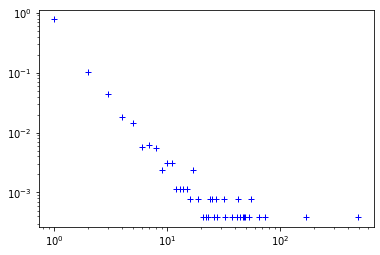

In [22]:
g1deg_dist = nx.degree_histogram(g1)
x = range(len(g1deg_dist))
y = [z/float(sum(g1deg_dist))for z in g1deg_dist]
plt.loglog(x,y,'+',color='blue',Marker='+')

### 度的幂律分布

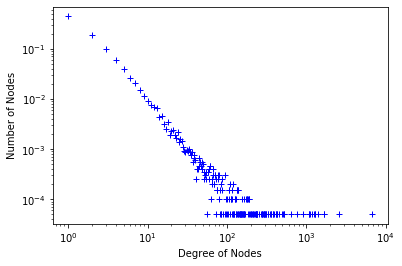

In [23]:
g2deg_dist = nx.degree_histogram(g2)
x = range(len(g2deg_dist))
y = [z/float(sum(g2deg_dist))for z in g2deg_dist]
plt.xlabel('Degree of Nodes')
plt.ylabel('Number of Nodes')
plt.loglog(x,y,'+',color='blue',Marker='+')
plt.savefig('./degree.png')

### 出度的幂律分布

In [24]:
# 获得出度的频数分布
d=pd.Series(list(dict(g2.out_degree()).values()))# 各节点对应的出度
d_counts = dict(d.value_counts())

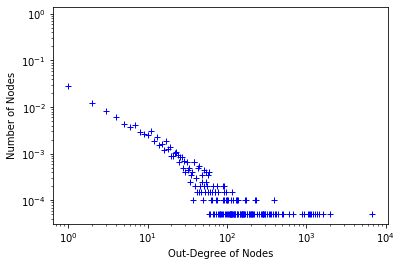

In [25]:
# 频数分布字典
g2_odeg_dist = {}
for i in range(d.max()+1):
    if i in d_counts:
        g2_odeg_dist[i]=d_counts[i]
    else:
        g2_odeg_dist[i]=0

# 频数分布对数图
g2_odeg_list = list(g2_odeg_dist.values())
x = range(len(g2_odeg_list))
y = [z/float(sum(g2_odeg_list))for z in g2_odeg_list]
plt.xlabel('Out-Degree of Nodes')
plt.ylabel('Number of Nodes')
plt.loglog(x,y,'+',color='blue',Marker='+')
plt.savefig('./outdegree.png')

### 入度的幂律分布

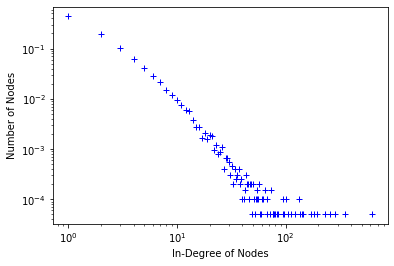

In [26]:
# 获得入度的频数分布
g2_ideg=pd.Series(list(dict(g2.in_degree()).values())) # 各节点对应的入度
g2_ideg_counts = dict(g2_ideg.value_counts()) # 不完全频数分布字典

# 完全频数分布字典
g2_ideg_dist = {}
for i in range(g2_ideg.max()+1):
    if i in g2_ideg_counts:
        g2_ideg_dist[i]=g2_ideg_counts[i]
    else:
        g2_ideg_dist[i]=0

# 频数分布对数图
g2_ideg_list = list(g2_ideg_dist.values())
x = range(len(g2_ideg_list))
y = [z/float(sum(g2_ideg_list))for z in g2_ideg_list]
plt.xlabel('In-Degree of Nodes')
plt.ylabel('Number of Nodes')
plt.loglog(x,y,'+',color='blue',Marker='+')
plt.savefig('./indegree.png')

## 小世界现象
### 平均聚类系数

In [27]:
print(nx.average_clustering(g1))
print(nx.average_clustering(g2))

0.001626256672456053
0.11378042753540316


### 网络平均路径长度 & 网络直径
python似乎没法计算这个图(可能是因为非连通性）的平均最短路径长度和直径，会报错
gephi结果是 网络平均路径长度为3.128，网络直径为11

In [28]:
#g2_random = nx.gnp_random_graph(19746,0.1,directed=True)

## 连通性
### 连通分支数

In [29]:
nx.number_weakly_connected_components(g2)

7

In [30]:
for i in nx.weakly_connected_components(g2):
    print(len(i))

19733
3
2
2
2
2
2


In [31]:
g2_components = nx.weakly_connected_components(g2)
g2_compo_list=list(g2_components)
g2_compo_list

[{16,
  19,
  39,
  43,
  46,
  56,
  69,
  73,
  78,
  80,
  86,
  88,
  94,
  100,
  107,
  137,
  144,
  161,
  166,
  179,
  184,
  187,
  202,
  206,
  214,
  222,
  239,
  253,
  260,
  261,
  281,
  285,
  299,
  310,
  312,
  332,
  343,
  356,
  357,
  365,
  375,
  396,
  398,
  402,
  407,
  417,
  421,
  436,
  448,
  460,
  465,
  470,
  471,
  477,
  483,
  493,
  524,
  525,
  530,
  538,
  543,
  556,
  560,
  573,
  583,
  587,
  590,
  599,
  603,
  611,
  625,
  639,
  640,
  645,
  670,
  671,
  675,
  676,
  690,
  691,
  692,
  694,
  702,
  714,
  715,
  718,
  723,
  725,
  730,
  734,
  748,
  752,
  756,
  769,
  773,
  777,
  783,
  787,
  817,
  829,
  834,
  845,
  846,
  872,
  886,
  888,
  900,
  902,
  904,
  910,
  918,
  929,
  947,
  953,
  966,
  970,
  1003,
  1017,
  1020,
  1029,
  1031,
  1049,
  1084,
  1097,
  1100,
  1106,
  1112,
  1116,
  1121,
  1126,
  1130,
  1141,
  1172,
  1181,
  1187,
  1204,
  1224,
  1231,
  1245,
  1255,
  1265,
 

In [32]:
nx.number_strongly_connected_components(g2)

19746

In [33]:
df_compo = pd.DataFrame([11247, 13424, 36848,7375, 33661,14013, 36501,6247, 17925,22132, 33504,34047, 37315])
df_compo

,0
0,11247
1,13424
2,36848
3,7375
4,33661
5,14013
6,36501
7,6247
8,17925
9,22132


In [34]:
filter_compo = dfnodes['id'].isin(df_compo[0])
df_compo = dfnodes[filter_compo]
df_compo

,id,name,ml_target,stars
6247,6247,Stanislas-Poisson,0,44189
7375,7375,blackccpie,1,56395
11247,11247,jpriniski,1,43303
13424,13424,SOUMAJYOTI,1,62921
14013,14013,LucasVigneron,0,59680
17925,17925,fabic,0,57136
22132,22132,nbermudezs,1,41880
33504,33504,eduarmreyes,0,56428
33661,33661,StoneSet,0,50119
34047,34047,milan-r-shah,1,61794


## 密度

In [35]:
nx.density(g2)

0.00017477984585035215

## 同配性

In [36]:
nx.degree_assortativity_coefficient(g2)

-0.13318599356852906

In [37]:
for i in range(g2.number_of_nodes()):
    n = nodes_roll2_list[i]
    g2.nodes[n]['stars']=dfnodes.iloc[n]['stars']
    
g2.nodes.data()

NodeDataView({6071: {'stars': 55405}, 5061: {'stars': 38125}, 31890: {'stars': 27018}, 31987: {'stars': 41978}, 11051: {'stars': 31961}, 1739: {'stars': 33829}, 29946: {'stars': 56915}, 33671: {'stars': 39914}, 202: {'stars': 56471}, 14148: {'stars': 36440}, 30494: {'stars': 25733}, 206: {'stars': 55415}, 13213: {'stars': 31944}, 5673: {'stars': 35300}, 24228: {'stars': 37366}, 222: {'stars': 57633}, 26810: {'stars': 23721}, 26786: {'stars': 34252}, 31278: {'stars': 37906}, 11105: {'stars': 27356}, 299: {'stars': 55066}, 36468: {'stars': 37334}, 375: {'stars': 57317}, 19253: {'stars': 29657}, 436: {'stars': 57201}, 18163: {'stars': 42968}, 24207: {'stars': 27190}, 24810: {'stars': 27434}, 448: {'stars': 63509}, 27803: {'stars': 36332}, 35358: {'stars': 26544}, 3832: {'stars': 37935}, 525: {'stars': 70237}, 22881: {'stars': 31152}, 587: {'stars': 56360}, 34082: {'stars': 47443}, 36322: {'stars': 29046}, 33128: {'stars': 31405}, 15405: {'stars': 38674}, 36345: {'stars': 32306}, 10534: {'

# 影响力度量
## 节点中心性
### 点度中心性

In [38]:
degree_centrality = nx.degree_centrality(g2)
sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)

[(27803, 0.34504937958976956),
 (31890, 0.1324892377817169),
 (13638, 0.08498354013674347),
 (19222, 0.08371739680931882),
 (9051, 0.07075208913649025),
 (2078, 0.0656875158267916),
 (35773, 0.0645226639655609),
 (7027, 0.06244618890858445),
 (10001, 0.05930615345657128),
 (5629, 0.05677386680172195),
 (73, 0.05525449480881236),
 (33671, 0.054697391744745506),
 (11051, 0.04608761711825779),
 (19253, 0.03823752848822487),
 (14242, 0.03291972651304128),
 (6631, 0.02623448974423905),
 (3712, 0.026133198278045076),
 (18945, 0.025525449480881236),
 (22881, 0.024715117751329452),
 (14954, 0.02294251709293492),
 (22642, 0.021575082299316282),
 (10080, 0.021372499366928338),
 (10830, 0.02101797923524943),
 (23589, 0.020815396302861482),
 (25477, 0.020005064573309698),
 (20173, 0.019447961509242846),
 (23664, 0.019042795644466953),
 (22353, 0.01833375538110914),
 (30002, 0.018131172448721197),
 (2431, 0.017574069384654344),
 (35008, 0.016763737655102556),
 (21142, 0.016561154722714612),
 (36652

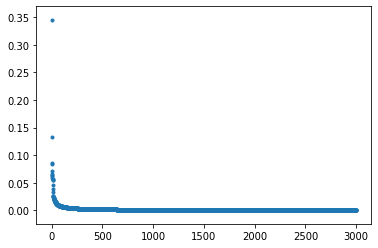

In [39]:
dc_list = sorted(list(degree_centrality.values()),reverse = True)
plt.scatter(x=range(3000),y=dc_list[0:3000],marker='.')

### 紧密中心性

In [40]:
closeness_centrality = nx.closeness_centrality(g2)
sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)

[(36652, 0.04729655187447747),
 (36628, 0.04685412510679079),
 (37471, 0.04673128393967531),
 (36819, 0.04428821337547126),
 (15940, 0.043417100378483876),
 (31890, 0.04195408708057641),
 (36909, 0.041818905328654635),
 (35008, 0.04135307060495182),
 (37107, 0.041030210101149905),
 (37557, 0.04051208722042728),
 (37087, 0.039725649750736954),
 (37248, 0.03966148573116442),
 (31255, 0.03943998556444973),
 (36799, 0.03936658374093691),
 (37651, 0.039213237871069624),
 (23086, 0.03913928332897377),
 (30767, 0.03913485036626628),
 (36055, 0.03873121072853023),
 (30809, 0.03854328541574596),
 (36834, 0.03851555631777484),
 (18163, 0.03849604002759319),
 (37462, 0.03841883665599825),
 (37331, 0.038345052614125234),
 (29543, 0.038262892769601445),
 (37644, 0.0381431021134399),
 (23458, 0.038124248977013414),
 (36581, 0.03795070590096929),
 (37562, 0.03790742617534765),
 (12137, 0.037872895818110125),
 (36528, 0.03772600775874774),
 (36693, 0.037653382565768244),
 (20434, 0.037639747446244154)

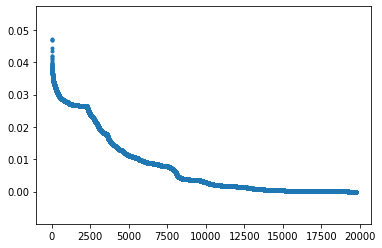

In [41]:
cc_list = sorted(list(closeness_centrality.values()),reverse = True)
plt.scatter(x=range(len(cc_list)),y=cc_list,marker='.')

### 介数中心性

In [42]:
betweenness_centrality = nx.betweenness_centrality(g2)
sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)

[(31890, 0.007299551976702549),
 (19222, 0.0032725227475726504),
 (35773, 0.00248093888998778),
 (13638, 0.0012499075376464928),
 (19253, 0.0008677584558816078),
 (22881, 0.0008484672323988284),
 (25477, 0.0007494308683315072),
 (10001, 0.00064972559521227),
 (3712, 0.0005097650803372901),
 (23664, 0.0004948104803395794),
 (11051, 0.0004651831862693352),
 (28957, 0.0004387406135523286),
 (30002, 0.0004319032066153135),
 (14242, 0.0003964795851623201),
 (33671, 0.0003759370011025233),
 (9051, 0.0003548583283440149),
 (29055, 0.0003502310158928028),
 (22353, 0.00033364946597317204),
 (23589, 0.00032971584704564723),
 (22642, 0.0002956396379683726),
 (20854, 0.0002899058896816697),
 (21375, 0.0002867705403731871),
 (27450, 0.00028639044820705104),
 (35008, 0.0002576750027185599),
 (22321, 0.00023267583248653137),
 (30199, 0.00023257833960542974),
 (25249, 0.0002290830635465196),
 (23838, 0.00022717333762291842),
 (18945, 0.0002158255541816986),
 (15191, 0.0002106533274906631),
 (11081, 0.

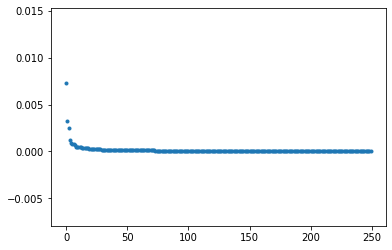

In [43]:
bc_list = sorted(list(betweenness_centrality.values()),reverse = True)
plt.scatter(x=range(250),y=bc_list[0:250],marker='.')

### 聚类系数

In [44]:
clustering = nx.clustering(g2)
sorted(clustering.items(), key=lambda x:x[1], reverse=True)

[(34082, 0.5),
 (19979, 0.5),
 (33506, 0.5),
 (18365, 0.5),
 (18535, 0.5),
 (18391, 0.5),
 (18393, 0.5),
 (23501, 0.5),
 (27706, 0.5),
 (9148, 0.5),
 (29995, 0.5),
 (27761, 0.5),
 (16814, 0.5),
 (26725, 0.5),
 (9222, 0.5),
 (19117, 0.5),
 (32478, 0.5),
 (22953, 0.5),
 (845, 0.5),
 (32663, 0.5),
 (19248, 0.5),
 (18524, 0.5),
 (18526, 0.5),
 (27853, 0.5),
 (7384, 0.5),
 (8580, 0.5),
 (18568, 0.5),
 (36023, 0.5),
 (27896, 0.5),
 (18597, 0.5),
 (9327, 0.5),
 (18606, 0.5),
 (9340, 0.5),
 (19882, 0.5),
 (19912, 0.5),
 (9352, 0.5),
 (9359, 0.5),
 (34636, 0.5),
 (27958, 0.5),
 (27959, 0.5),
 (18655, 0.5),
 (9388, 0.5),
 (6455, 0.5),
 (18729, 0.5),
 (9447, 0.5),
 (9453, 0.5),
 (28052, 0.5),
 (28053, 0.5),
 (20551, 0.5),
 (2277, 0.5),
 (20575, 0.5),
 (18760, 0.5),
 (28077, 0.5),
 (24736, 0.5),
 (13803, 0.5),
 (32796, 0.5),
 (28088, 0.5),
 (28089, 0.5),
 (33077, 0.5),
 (2573, 0.5),
 (18431, 0.5),
 (20938, 0.5),
 (18818, 0.5),
 (18826, 0.5),
 (9544, 0.5),
 (28146, 0.5),
 (9552, 0.5),
 (9574, 0.5),

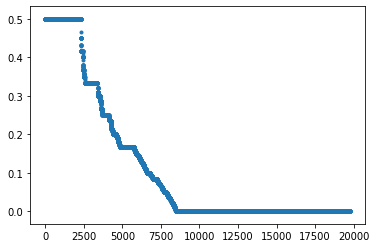

In [45]:
clustering_list = sorted(list(clustering.values()),reverse = True)
plt.scatter(x=range(len(clustering)),y=clustering_list,marker='.')

## HITS算法

In [46]:
h,a = nx.hits(g2)
index = [i for i in h.keys()] 
h = [i for i in h.values()]
a = [i for i in a.values()]
df = pd.DataFrame({'id': index,
                   'hub': h,
                  'authority':a})
df.to_csv('./github数据集/结果数据/hits_original.csv')
df

,id,hub,authority
0,6071,0.000109,0.000000e+00
1,5061,0.002971,1.097157e-04
2,31890,0.017006,5.371931e-04
3,31987,0.000323,1.014730e-07
4,11051,0.008407,1.451228e-04
...,...,...,...
19741,36825,0.000002,0.000000e+00
19742,37485,0.000000,1.420982e-08
19743,37431,0.000000,2.741761e-08
19744,37460,0.000000,2.741761e-08
